# Guide to the experiments of 'A variational approach to privacy and fairness'

First of all, in order to be able to run the code of the paper, one needs to install the dependencies. A simple way is running the following command in a virtual environment:

```console
pip3 install -r requirements.txt
```

**Note:The code was runned on *python 3.6* with the above dependencies. However, it could also work prior or future versions of the packages.

After that, one can generate the all the necessary data to later visualize the experiments running the following commands on the `src` folder:

```console
python3 run_experiments.py --experiment 1 
python3 run_experiments.py --experiment 2 
python3 run_experiments.py --experiment 3 
python3 run_experiments.py --experiment 4 
python3 run_experiments.py --experiment 5 
python3 run_experiments.py --experiment 6 
python3 run_experiments.py --experiment 7 
```

The data will be stored in `results/logs/` and the generated images (some of which will be generated with this guide) in `results/images/`.

**Note:** In this `.zip` file, the logs and images are already computed, but they can be erased and computed again as described above.

### Figure generation functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
def smooth(x, window_len):
    
    y = np.array([np.mean(x[max(0,i-window_len):min(len(x)-1,i+window_len)]) for i in range(len(x))])
    return y

def plot_vs_figure(x, y, xname, yname, wlen=7, xaxis='lin'):
    
    fig, ax = plt.subplots()
    model = interpolate.interp1d(x,y)
    x_plot = np.linspace(x.min(), x.max(), 100)
    y_plot = smooth(model(x_plot),window_len=wlen)
    plt.scatter(x,y,marker='.', color='black')
    plt.plot(x_plot, y_plot, linestyle = ':', color='black')
    plt.xlabel(xname)
    plt.ylabel(yname)
    if xaxis == 'log':
        plt.xscale('log')

def plot_vs_figure_comp(x, y1, y2, xname, yname, y1type, y2type, wlen=7, xaxis='lin'):
    
    fig, ax = plt.subplots()
    model = interpolate.interp1d(x,y1)
    x_plot = np.linspace(x.min(), x.max(), 100)
    y1_plot = smooth(model(x_plot),window_len=wlen)
    plt.scatter(x,y1,marker='.', color='black')
    plt.plot(x_plot, y1_plot, linestyle = ':', color='black',label=y1type)
    model = interpolate.interp1d(x,y2)
    x_plot = np.linspace(x.min(), x.max(), 100)
    y2_plot = smooth(model(x_plot),window_len=wlen)
    plt.scatter(x,y2,marker='.', color='gray')
    plt.plot(x_plot, y2_plot, linestyle = ':', color='gray',label=y2type)
    plt.xlabel(xname)
    plt.ylabel(yname)
    if xaxis == 'log':
        plt.xscale('log')

# Experiment 2 : Fairness on the Adult dataset

In [3]:
betas = np.load('results/logs/adult/fairness/betas.npy')
IXY = np.load('results/logs/adult/fairness/IXY.npy')
ISY = np.load('results/logs/adult/fairness/ISY.npy')
ITY_given_S = np.load('results/logs/adult/fairness/ITY_given_S.npy')
metrics_lin = np.load('results/logs/adult/fairness/metrics_lin.npy')
metrics_rf = np.load('results/logs/adult/fairness/metrics_rf.npy')
original_data_metrics_lin = np.load('results/logs/adult/fairness/original_data_metrics_lin.npy')
original_data_metrics_rf = np.load('results/logs/adult/fairness/original_data_metrics_rf.npy')
original_data_metrics_dummy = np.load('results/logs/adult/fairness/original_data_metrics_dummy.npy')
metric_names = ['Accuracy (T)', 'Accuracy (S)', 'Discrimination', 'Error Gap', 'Equalized Odds Gap']

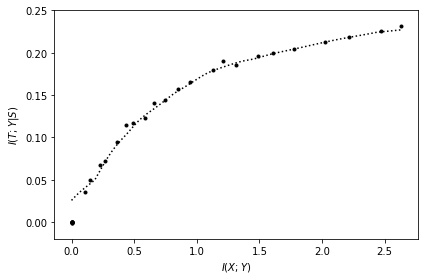

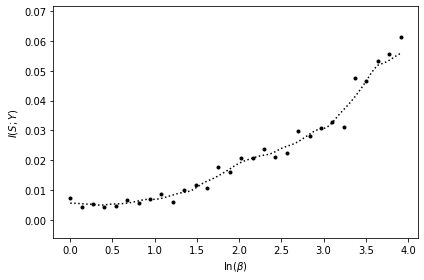

In [4]:
plot_vs_figure(IXY,ITY_given_S,r'$I(X;Y)$',r'$I(T;Y|S)$')
plt.tight_layout()
plt.savefig('results/images/adult/fairness/ixy_vs_ity_given_s.pdf',format='pdf')
plot_vs_figure(np.log(betas),ISY,r'$\ln(\beta)$',r'$I(S;Y)$')
plt.tight_layout()
plt.savefig('results/images/adult/fairness/betas_vs_isy.pdf',format='pdf')

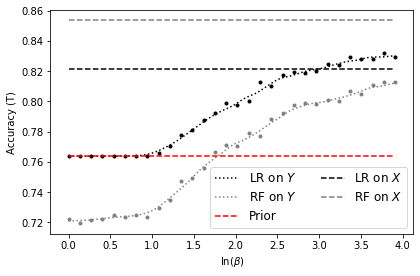

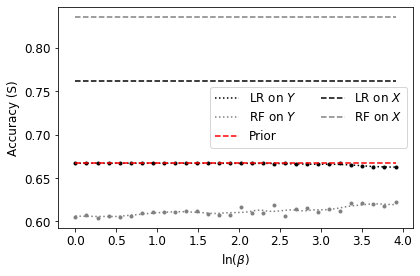

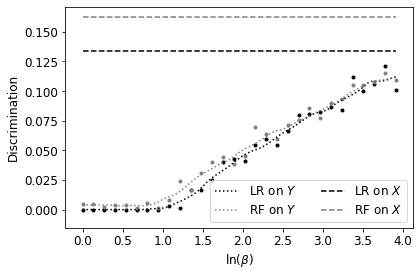

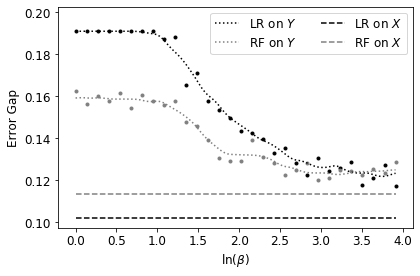

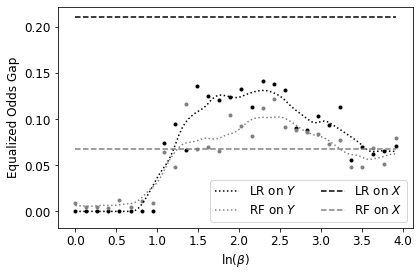

In [5]:
for metric_lin, metric_rf, original_data_metric_lin, original_data_metric_rf, \
    original_data_metric_dummy, name in zip(metrics_lin.T, metrics_rf.T, \
    original_data_metrics_lin.T, original_data_metrics_rf.T, \
    original_data_metrics_dummy, metric_names):
    
    plot_vs_figure_comp(np.log(betas),metric_lin, metric_rf,r'$\ln(\beta)$',name, \
                        r'LR on $Y$', r'RF on $Y$', xaxis='lin')
    
    newname = name.lower().replace('(','').replace(')','').replace(' ','_')
    if newname == 'accuracy_t' or newname == 'accuracy_s':
        plt.plot(np.log(betas),np.ones(len(betas))*original_data_metric_dummy,linestyle='--',\
                 color='red',label=r'Prior')

    plt.plot(np.log(betas),np.ones(len(betas))*original_data_metric_lin,linestyle='--',\
                 color='black',label=r'LR on $X$')
    plt.plot(np.log(betas),np.ones(len(betas))*original_data_metric_rf,linestyle='--',\
                 color='gray',label=r'RF on $X$')
    
    plt.rc('font', size=12)  
    plt.legend(ncol=2)
    plt.tight_layout()
    plt.savefig(f'results/images/adult/fairness/betas_vs_{newname}.pdf',format='pdf')

## Experiment 3 : Fairness on the Colored MNIST dataset

In [6]:
betas = np.load('results/logs/colored_mnist/fairness/betas.npy')
IXY = np.load('results/logs/colored_mnist/fairness/IXY.npy')
ISY = np.load('results/logs/colored_mnist/fairness/ISY.npy')
ITY_given_S = np.load('results/logs/colored_mnist/fairness/ITY_given_S.npy')

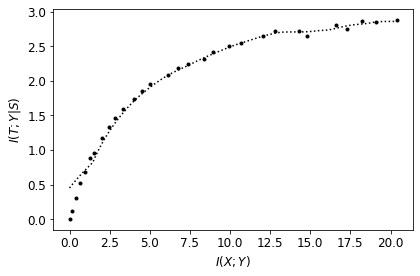

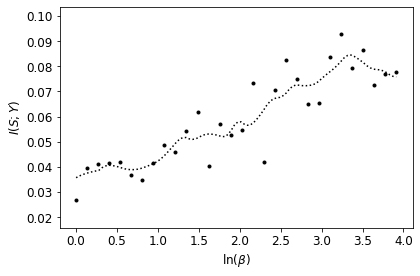

In [7]:
plot_vs_figure(IXY,ITY_given_S,r'$I(X;Y)$',r'$I(T;Y|S)$')
plt.tight_layout()
plt.savefig('results/images/colored_mnist/fairness/ixy_vs_ity_given_s.pdf',format='pdf')
plot_vs_figure(np.log(betas),ISY,r'$\ln(\beta)$',r'$I(S;Y)$')
plt.tight_layout()
plt.savefig('results/images/colored_mnist/fairness/betas_vs_isy.pdf',format='pdf')

## Experiment 4 : Privacy on the Adult dataset

In [8]:
gammas = np.load('results/logs/adult/privacy/gammas.npy')
IXY = np.load('results/logs/adult/privacy/IXY.npy')
ISY = np.load('results/logs/adult/privacy/ISY.npy')
H_X_given_SY = np.load('results/logs/adult/privacy/H_X_given_SY.npy')

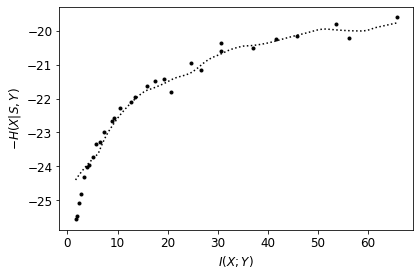

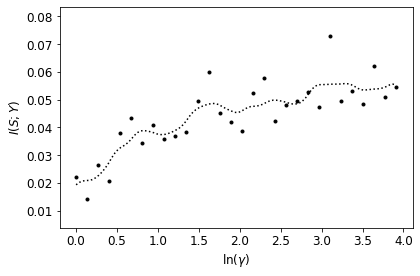

In [9]:
plot_vs_figure(IXY,-H_X_given_SY,r'$I(X;Y)$',r'$-H(X|S,Y)$')
plt.tight_layout()
plt.savefig('results/images/adult/privacy/ixy_vs_minus_hx_given_sy.pdf',format='pdf')
plot_vs_figure(np.log(gammas),ISY,r'$\ln(\gamma)$',r'$I(S;Y)$')
plt.tight_layout()
plt.savefig('results/images/adult/privacy/gammas_vs_isy.pdf',format='pdf')

## Experiment 5 : Privacy on the Colored MNIST dataset

In [10]:
gammas = np.load('results/logs/colored_mnist/privacy/gammas.npy')
IXY = np.load('results/logs/colored_mnist/privacy/IXY.npy')
ISY = np.load('results/logs/colored_mnist/privacy/ISY.npy')
H_X_given_SY = np.load('results/logs/colored_mnist/privacy/H_X_given_SY.npy')

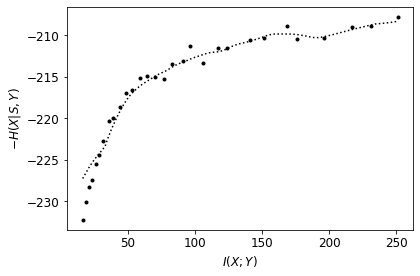

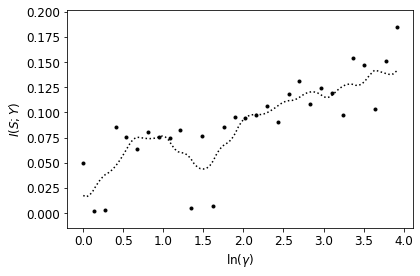

In [11]:
plot_vs_figure(IXY,-H_X_given_SY,r'$I(X;Y)$',r'$-H(X|S,Y)$')
plt.tight_layout()
plt.savefig('results/images/colored_mnist/privacy/ixy_vs_minus_hx_given_sy.pdf',format='pdf')
plot_vs_figure(np.log(gammas),ISY,r'$\ln(\gamma)$',r'$I(S;Y)$')
plt.tight_layout()
plt.savefig('results/images/colored_mnist/privacy/gammas_vs_isy.pdf',format='pdf')

## Experiment 6 : Fairness on the COMPAS dataset

In [12]:
betas = np.load('results/logs/compas/fairness/betas.npy')
IXY = np.load('results/logs/compas/fairness/IXY.npy')
ISY = np.load('results/logs/compas/fairness/ISY.npy')
ITY_given_S = np.load('results/logs/compas/fairness/ITY_given_S.npy')
metrics_lin = np.load('results/logs/compas/fairness/metrics_lin.npy')
metrics_rf = np.load('results/logs/compas/fairness/metrics_rf.npy')
original_data_metrics_lin = np.load('results/logs/compas/fairness/original_data_metrics_lin.npy')
original_data_metrics_rf = np.load('results/logs/compas/fairness/original_data_metrics_rf.npy')
original_data_metrics_dummy = np.load('results/logs/compas/fairness/original_data_metrics_dummy.npy')
metric_names = ['Accuracy (T)', 'Accuracy (S)', 'Discrimination', 'Error Gap', 'Equalized Odds']

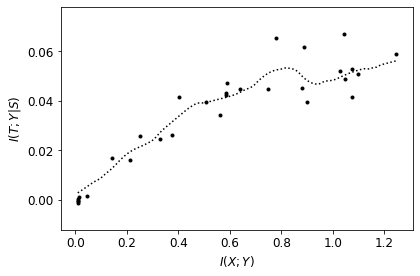

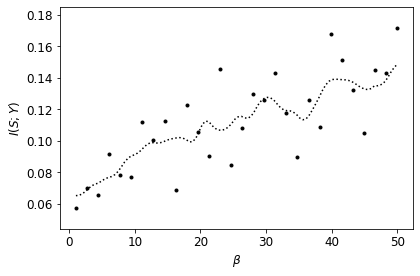

In [13]:
plot_vs_figure(IXY,ITY_given_S,r'$I(X;Y)$',r'$I(T;Y|S)$')
plt.tight_layout()
plt.savefig('results/images/compas/fairness/ixy_vs_ity_given_s.pdf',format='pdf')
plot_vs_figure(betas,ISY,r'$\beta$',r'$I(S;Y)$')
plt.tight_layout()
plt.savefig('results/images/compas/fairness/betas_vs_isy.pdf',format='pdf')

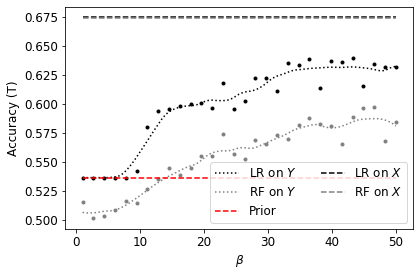

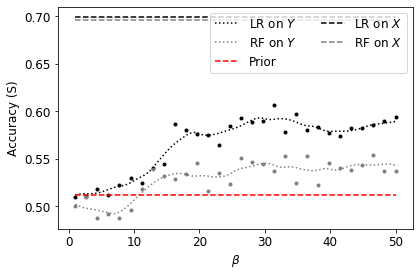

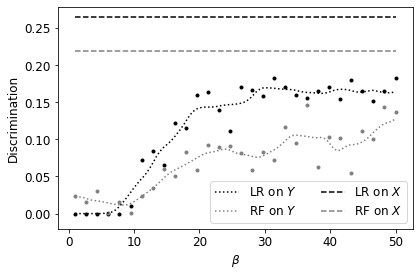

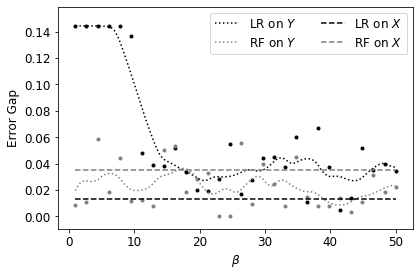

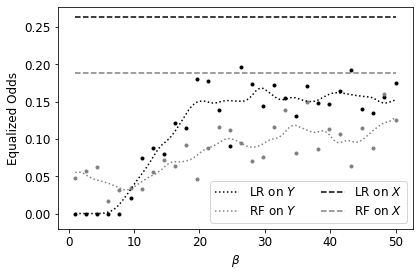

In [14]:
for metric_lin, metric_rf, original_data_metric_lin, original_data_metric_rf, \
    original_data_metric_dummy, name in zip(metrics_lin.T, metrics_rf.T, \
    original_data_metrics_lin.T, original_data_metrics_rf.T, \
    original_data_metrics_dummy, metric_names):
    
    plot_vs_figure_comp(betas,metric_lin, metric_rf,r'$\beta$',name, \
                        r'LR on $Y$', r'RF on $Y$', xaxis='lin')
    
    newname = name.lower().replace('(','').replace(')','').replace(' ','_')
    if newname == 'accuracy_t' or newname == 'accuracy_s':
        plt.plot(betas,np.ones(len(betas))*original_data_metric_dummy,linestyle='--',\
                 color='red',label=r'Prior')
    
    plt.plot(betas,np.ones(len(betas))*original_data_metric_lin,linestyle='--',\
                 color='black',label=r'LR on $X$')
    plt.plot(betas,np.ones(len(betas))*original_data_metric_rf,linestyle='--',\
                 color='gray',label=r'RF on $X$')
    
    plt.rc('font', size=12)  
    plt.legend(ncol=2)
    plt.tight_layout()
    plt.savefig(f'results/images/compas/fairness/betas_vs_{newname}.pdf',format='pdf')

# Experiment 7

In [15]:
gammas = np.load('results/logs/compas/privacy/gammas.npy')
IXY = np.load('results/logs/compas/privacy/IXY.npy')
ISY = np.load('results/logs/compas/privacy/ISY.npy')
H_X_given_SY = np.load('results/logs/compas/privacy/H_X_given_SY.npy')

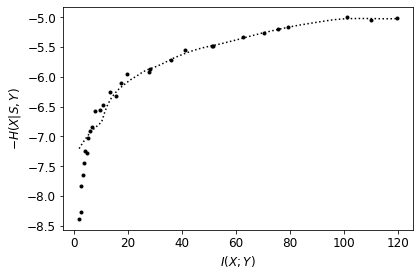

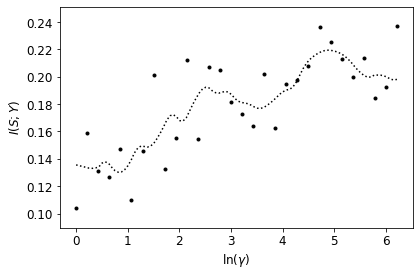

In [16]:
plot_vs_figure(IXY,-H_X_given_SY,r'$I(X;Y)$',r'$-H(X|S,Y)$')
plt.tight_layout()
plt.savefig('results/images/compas/privacy/ixy_vs_minus_hx_given_sy.pdf',format='pdf')
plot_vs_figure(np.log(gammas),ISY,r'$\ln(\gamma)$',r'$I(S;Y)$')
plt.tight_layout()
plt.savefig('results/images/compas/privacy/gammas_vs_isy.pdf',format='pdf')